# US Accident Exploratory Data Analysis
- road accidents are majour reason of killing and injuring people worldwide
- This project is to find the insights of the accident happening in usa 
- we use pandas to cleans the datasets and seaborn for visualisation 

- we loaded the data from kaggle "https://www.kaggle.com/sobhanmoosavi/us-accidents"
- this data showing us the information about the accidnent happed from 2016 to 2021
- it can be usefull to prevent the accident on some level
- in this data set New York is missing is Cities

In [1]:
pip install opendatasets --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
datafile = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

In [4]:
od.download(datafile)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [5]:
import os

In [6]:
data_file = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preperation and Cleaning
- 1.Load the file using pandas 
- 2.look some information about the data and columns
- 3.fix any missing or incorrect values 

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(data_file)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
numerics = ['int16' ,'int32' , 'int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) /len(df)
missing_percentages

In [ ]:
missing_percentages.plot()

In [ ]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

## Exploratory data anyalysis and visuliazation
- 1.city
- 2.Start Time
- 3.Start Lat , Start Lng
- 4.Temperature
- 5.Weather Condition

### City

In [ ]:
cities = df.City.unique()
len(cities)

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

In [ ]:
cities_by_accident[:20].plot(kind = 'barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
sns.histplot(cities_by_accident , log_scale =True)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<=1000]

In [ ]:
len(high_accident_cities)/len(cities)

In [ ]:
sns.distplot(high_accident_cities)

In [ ]:
sns.histplot(low_accident_cities , log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

### Start Time

In [ ]:
df.Start_Time

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins = 24 , kde = False, norm_hist = True)

-Hight percentage of accidents occure bwtween 2 to 4 pm

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins = 7 , kde = False, norm_hist = True)

IS the distribution of accidents by hour the same on weekends as on weekdays

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour,bins = 24 , kde = False, norm_hist = True)

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour,bins = 24 , kde = False, norm_hist = True)

 on sunday, the pak occurs between 2 to 4 pm , justlike workdays ,but from 7 to 9 am more accidents were happen than sundays (may be because of on workdays people are in rush to reach office)


In [ ]:
sns.distplot(df.Start_Time.dt.month,bins = 12 , kde = False, norm_hist = True)

Can you Explain the month-wise trend of accidents?
 - much data is missing for 2016 , 2020 may be even for 2019
 - their seems to be issue with data

In [ ]:
df_2018 = df[df.Start_Time.dt.year ==2021]
sns.distplot(df_2018.Start_Time.dt.month,bins = 12 , kde = False, norm_hist = True)

### Start Latitude & Start Longitude

In [ ]:
df.Start_Lat 

In [ ]:
df.Start_Lng

In [ ]:
sample_df = df.sample(int(0.1  * len(df)))


In [ ]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat , size = 0.001 )

In [ ]:
pip install folium --quiet

In [ ]:
import folium

In [ ]:
lat = df.Start_Lat[0]
lon = df.Start_Lng[0]
lat , lon

In [ ]:
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.0001*len(df)))
lat_lon_pairs = list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Question & Answer 

#### 1.Are their more accident in warmer or colder areas?

In [9]:
df['Temperature(F)']

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature(F), Length: 2845342, dtype: float64

In [ ]:
df.max()

In [25]:
temp_wise_accident = df.groupby(pd.cut(df['Temperature(F)'],np.arange(-8.0,200)))['ID'].count().reset_index().rename(columns = {'ID':'count'})
temp_wise_accident

,Temperature(F),count
0,"(-8.0, -7.0]",0
1,"(-7.0, -6.0]",0
2,"(-6.0, -5.0]",0
3,"(-5.0, -4.0]",0
4,"(-4.0, -3.0]",0
...,...,...
202,"(194.0, 195.0]",0
203,"(195.0, 196.0]",0
204,"(196.0, 197.0]",0
205,"(197.0, 198.0]",0


<AxesSubplot:>

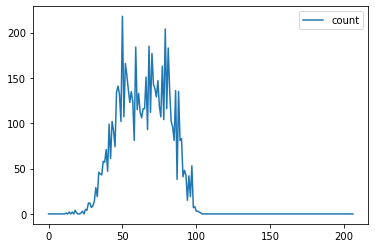

In [20]:
temp_wise_accident.plot()

- From above plot we can clearly state that more accidend are happened between 60 to 90 F Temperature that means their are more accident in colder areas than warmer areas that may be because of visibility problem is more in colder area


In [14]:
new_york = (df['City'].where(df['City'] == 'New York')).count()
new_york

7068

In [27]:
'NY' in df.State

False

<AxesSubplot:>

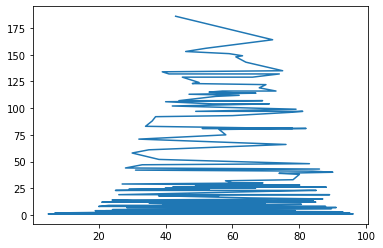

##  Questions for future works
- 1.Are their more accident in warmer or colder areas?
- 2.Which 5states have highest number of accidents per capita?
- 3.Does New York shows in data ?If yes ,why is the count lower if this the most populated city?
- 4.Among the top 100 citites in number of accidents,which states do they belongs to most frequently
- 5.What time of the day are accidents most frequesnt in?
- 6.Which Day of week have the most Accidents?
- 7.Which months have the most accidents?
- 8.What is the trend of accidents year over year(decreasing?Increasng)
- 9.When is the accident per unit of traffic the highest
- 10.Can you Explain the month-wise trend of accidents?

## Summary and Conclusion
Insights:
- NO data for New York 
- The number of accidents per city decreases exponentially
- Less than 4% of citites have more than 1000 yearly accidents.
- over 1100 cities have reported just one accident
- on weekends the number of accidents are less 

## Areas For Future Work